In [40]:
import numpy as np
import random
import operator
import pandas as pd
import matplotlib.pyplot as plt
import time

In [2]:
cities = np.load("cities.npy", allow_pickle = True)

In [3]:
class City:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def distance(self, city):
        xDis = abs(self.x - city.x)
        yDis = abs(self.y - city.y)
        distance = np.sqrt((xDis ** 2) + (yDis ** 2))
        return distance
    
    def __repr__(self):
        return "(" + str(self.x) + "," + str(self.y) + ")"

In [4]:
class Fitness:
    def __init__(self, route):
        self.route = route
        self.distance = 0
        self.fitness= 0.0
    
    def routeDistance(self):
        if self.distance ==0:
            pathDistance = 0
            for i in range(0, len(self.route)):
                fromCity = self.route[i]
                toCity = None
                if i + 1 < len(self.route):
                    toCity = self.route[i + 1]
                else:
                    toCity = self.route[0]
                pathDistance += fromCity.distance(toCity)
            self.distance = pathDistance
        return self.distance
    
    def routeFitness(self):
        if self.fitness == 0:
            self.fitness = 1 / float(self.routeDistance())
        return self.fitness

In [5]:
def createRoute(cityList):
    route = random.sample(cityList, len(cityList))
    return route

In [6]:
def initialPopulation(popSize, cityList):
    population = []

    for i in range(0, popSize):
        population.append(createRoute(cityList))
    return population

In [7]:
def rankRoutes(population):
    fitnessResults = {}
    for i in range(0,len(population)):
        fitnessResults[i] = Fitness(population[i]).routeFitness()
    return sorted(fitnessResults.items(), key = operator.itemgetter(1), reverse = True)

In [8]:
def selection(popRanked, eliteSize):
    selectionResults = []
    df = pd.DataFrame(np.array(popRanked), columns=["Index","Fitness"])
    df['cum_sum'] = df.Fitness.cumsum()
    df['cum_perc'] = 100*df.cum_sum/df.Fitness.sum()
    
    for i in range(0, eliteSize):
        selectionResults.append(popRanked[i][0])
    for i in range(0, len(popRanked) - eliteSize):
        pick = 100*random.random()
        for i in range(0, len(popRanked)):
            if pick <= df.iat[i,3]:
                selectionResults.append(popRanked[i][0])
                break
    return selectionResults

In [9]:
def matingPool(population, selectionResults):
    matingpool = []
    for i in range(0, len(selectionResults)):
        index = selectionResults[i]
        matingpool.append(population[index])
    return matingpool

In [11]:
def breed(parent1, parent2):
    child = []
    childP1 = []
    childP2 = []
    
    geneA = int(random.random() * len(parent1))
    geneB = int(random.random() * len(parent1))
    
    startGene = min(geneA, geneB)
    endGene = max(geneA, geneB)

    for i in range(startGene, endGene):
        childP1.append(parent1[i])
        
    childP2 = [item for item in parent2 if item not in childP1]

    child = childP1 + childP2
    return child

In [12]:
def breedPopulation(matingpool, eliteSize):
    children = []
    length = len(matingpool) - eliteSize
    pool = random.sample(matingpool, len(matingpool))

    for i in range(0,eliteSize):
        children.append(matingpool[i])
    
    for i in range(0, length):
        child = breed(pool[i], pool[len(matingpool)-i-1])
        children.append(child)
    return children

In [13]:
def mutate(individual, mutationRate):
    for swapped in range(len(individual)):
        if(random.random() < mutationRate):
            swapWith = int(random.random() * len(individual))
            
            city1 = individual[swapped]
            city2 = individual[swapWith]
            
            individual[swapped] = city2
            individual[swapWith] = city1
    return individual

In [14]:
def mutatePopulation(population, mutationRate):
    mutatedPop = []
    
    for ind in range(0, len(population)):
        mutatedInd = mutate(population[ind], mutationRate)
        mutatedPop.append(mutatedInd)
    return mutatedPop

In [15]:
def nextGeneration(currentGen, eliteSize, mutationRate):
    popRanked = rankRoutes(currentGen)
    selectionResults = selection(popRanked, eliteSize)
    matingpool = matingPool(currentGen, selectionResults)
    children = breedPopulation(matingpool, eliteSize)
    nextGeneration = mutatePopulation(children, mutationRate)
    return nextGeneration

In [16]:
def geneticAlgorithm(population, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation(popSize, population)
    print("Initial distance: " + str(1 / rankRoutes(pop)[0][1]))
    
    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
    
    print("Final distance: " + str(1 / rankRoutes(pop)[0][1]))
    bestRouteIndex = rankRoutes(pop)[0][0]
    bestRoute = pop[bestRouteIndex]
    return bestRoute

In [20]:
citylist = []

for i in range(0,len(cities)-1):
    citylist.append(City(x=cities[i][0], y=cities[i][1]))

In [21]:
geneticAlgorithm(population=citylist, popSize=100, eliteSize=20, mutationRate=0.01, generations=500)

Initial distance: 505.42578812901615
Final distance: 470.84195724908716


[(0.6501756616742724,0.1688866881745451),
 (0.7363656014228492,0.7395436909522048),
 (0.3256528515366811,0.5339463777376506),
 (0.3026387721293362,0.708171705552576),
 (0.978270024492778,0.5311976745688559),
 (0.8469008295484634,0.4382939780187938),
 (0.7140373615369016,0.15148535936738372),
 (0.03557685390660592,0.5796131512610505),
 (0.13689352675653654,0.4205698221900136),
 (0.567070423459914,0.5825262389964471),
 (0.5354489091686377,0.7387221184259068),
 (0.9284219314620187,0.804158151956166),
 (0.020628770828832965,0.24294613292551748),
 (0.969724930108859,0.320599079048416),
 (0.06010207907139287,0.8340817728346989),
 (0.6382427221488298,0.9786481595575972),
 (0.2561855652513916,0.9376071456751677),
 (0.3261908061101393,0.9458686357133468),
 (0.23428248784009464,0.8770272379994261),
 (0.9005977648274625,0.9944998763882322),
 (0.24605224452731933,0.6992358256402785),
 (0.1352038714245829,0.3143500159778485),
 (0.17978954499947508,0.1988906768791524),
 (0.3611552623492873,0.3047466

In [34]:
def geneticAlgorithmPlot(population, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation(popSize, population)
    progress = []
    progress.append(1 / rankRoutes(pop)[0][1])
    
    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
        progress.append(1 / rankRoutes(pop)[0][1])
    
    plt.plot(progress)
    plt.ylabel('Distance')
    plt.xlabel('Generation')
    plt.show()

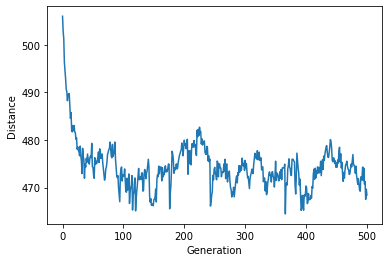

In [35]:
geneticAlgorithmPlot(population=citylist, popSize=100, eliteSize=20, mutationRate=0.01, generations=500)

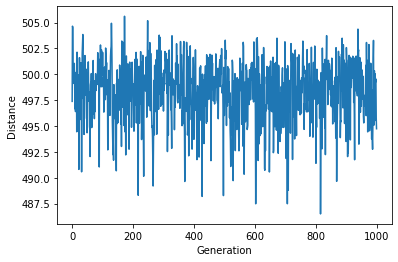

Mutation rate =  0.1  in  688.5578792095184 seconds


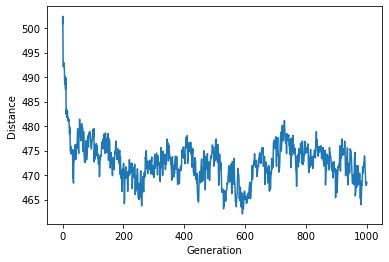

Mutation rate =  0.01  in  663.6875767707825 seconds


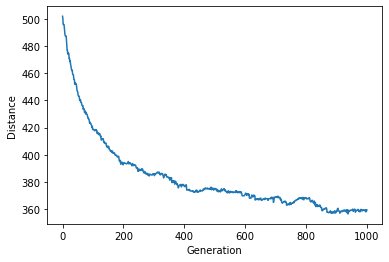

Mutation rate =  0.001  in  664.3445587158203 seconds


In [43]:
# Mutation Rate parameter tuning
for i in [0.1, 0.01, 0.001]:
    t0 = time.time()
    geneticAlgorithmPlot(population=citylist, popSize=100, eliteSize=20, mutationRate=i, generations=1000)
    t1 = time.time()
    print("Mutation rate = ", i, " in ", t1-t0, "seconds")

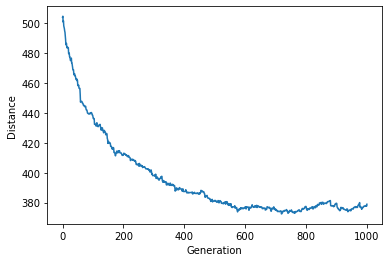

Number of Elites =  10  in  685.1674332618713 seconds


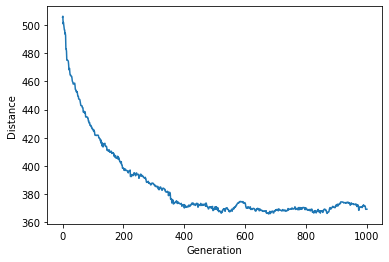

Number of Elites =  20  in  836.7704436779022 seconds


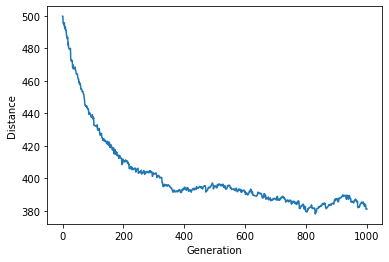

Number of Elites =  50  in  885.9206557273865 seconds


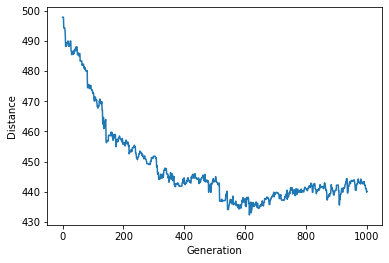

Number of Elites =  80  in  748.8608751296997 seconds


In [54]:
# Number of elites parameter tuning
for i in [10, 20, 50, 80]:
    t0 = time.time()
    geneticAlgorithmPlot(population=citylist, popSize=100, eliteSize=i, mutationRate=0.001, generations=1000)
    t1 = time.time()
    print("Number of Elites = ", i, " in ", t1-t0, "seconds")

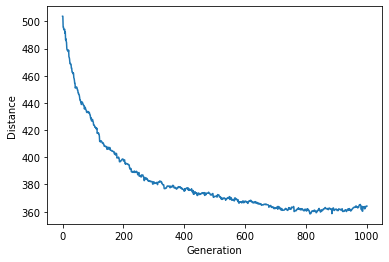

Population Size =  100  in  856.3589973449707 seconds


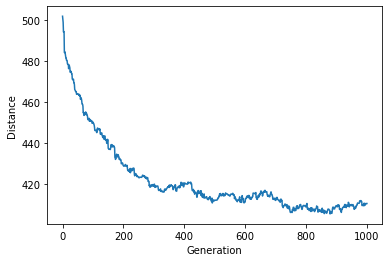

Population Size =  500  in  5813.246115684509 seconds


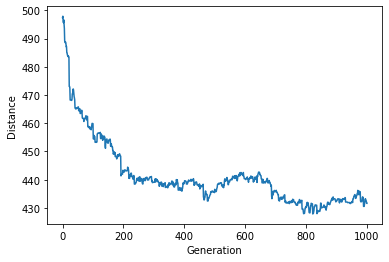

Population Size =  1000  in  13039.006446838379 seconds


In [55]:
# Population size parameter tuning
for i in [100, 500, 1000]:
    t0 = time.time()
    geneticAlgorithmPlot(population=citylist, popSize=i, eliteSize=20, mutationRate=0.001, generations=1000)
    t1 = time.time()
    print("Population Size = ", i, " in ", t1-t0, "seconds")

In [56]:
geneticAlgorithm(population=citylist, popSize=100, eliteSize=20, mutationRate=0.001, generations=500)

Initial distance: 501.9021211404673
Final distance: 370.24681521980045


[(0.824095629219304,0.11110254407504194),
 (0.8086369664114401,0.1475435578793699),
 (0.5388687909823405,0.47691882271925357),
 (0.5544723698865066,0.22950470823799063),
 (0.9257000423111498,0.7423719075310288),
 (0.8780307949434799,0.8673897348853961),
 (0.7395015952445254,0.7703319743649705),
 (0.8926930002868432,0.8855919731150029),
 (0.9808663078961132,0.7227760700004656),
 (0.20483682649143786,0.5429335059143171),
 (0.526323694140872,0.1665120081582614),
 (0.594365791386986,0.1046981711778534),
 (0.5975252967724629,0.13247482806836186),
 (0.9496419773080675,0.8565991869599343),
 (0.6396850693622157,0.8358860615633331),
 (0.40677706185490514,0.795060264119713),
 (0.29946653025753533,0.6667248414964141),
 (0.5444152688300402,0.8319696176737728),
 (0.03557685390660592,0.5796131512610505),
 (0.43894848850914336,0.4164956874873378),
 (0.2799347931224234,0.456349995075649),
 (0.973374396723018,0.4933566786576996),
 (0.40946820797803907,0.8207593698145657),
 (0.6702006115088371,0.9369671